In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from matplotlib import cm

In [2]:
#importing google play store csv file
df=pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# checking the data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Removing the null values and and changing the datatypes of the columns

In [5]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
# removing invalid Review
df=df.drop([10472])

In [7]:
#changing the datatype of Reviews to int
df["Reviews"]=df["Reviews"].astype("int")

In [8]:
#converting all the values to thousands i.e in k
df["Size"]=df["Size"].str.replace('M','000')
df["Size"]=df["Size"].str.replace('k',' ')

In [9]:
df[df['Size']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [10]:
# replacing the 'Varies with device' values with nan
df["Size"]=df["Size"].str.replace('Varies with device',str(np.nan))

In [11]:
#changing the datatype of Size to float
df["Size"]=df["Size"].astype("float")

In [12]:
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [13]:
for i in df["Size"]:
    if i<10:
        df["Size"]=df["Size"].replace(i,i*1000)

In [14]:
# standardising the values of size
df["Size"]=df["Size"]/1000

In [15]:
# removing the unnecessary symbols from Installs and Price columns
char_to_remove=["+",",","$"]
col_to_clean=["Installs","Price"]
for items in char_to_remove:
    for col in col_to_clean:
        df[col]=df[col].str.replace(items,"",regex=True)

In [16]:
#changing the datatype of Installs to int
df["Installs"]=df["Installs"].astype("int")

In [17]:
#changing the datatype of Price to int
df["Price"]=df["Price"].astype("float")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [19]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])

In [20]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [21]:
#dropping nan from Current Ver 
df[df['Current Ver'].isnull()==True]
df=df.dropna(subset='Current Ver')

In [22]:
#dropping nan from Android Ver 
df=df.dropna(subset='Android Ver')

In [23]:
#dropping nan from Type
df=df.dropna(subset='Type')

In [24]:
# filling the nan values of Rating with mean
df['Rating']=df['Rating'].fillna(np.round(df['Rating'].mean(),2))

In [25]:
#updated datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          10829 non-null  float64       
 3   Reviews         10829 non-null  int32         
 4   Size            9135 non-null   float64       
 5   Installs        10829 non-null  int32         
 6   Type            10829 non-null  object        
 7   Price           10829 non-null  float64       
 8   Content Rating  10829 non-null  object        
 9   Genres          10829 non-null  object        
 10  Last Updated    10829 non-null  datetime64[ns]
 11  Current Ver     10829 non-null  object        
 12  Android Ver     10829 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.1+ MB


In [26]:
# dropping the duplicate values from app
df.drop_duplicates(subset='App',inplace=True)

In [27]:
df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
KineMaster – Pro Video Editor                     1
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9648, dtype: int64

In [56]:
# calculating the top 8 categories
top_counts = df['Category'].value_counts().nlargest(5)
top_counts

FAMILY      1828
GAME         959
TOOLS        825
BUSINESS     420
MEDICAL      395
Name: Category, dtype: int64

## Top 8 categories in the google play store

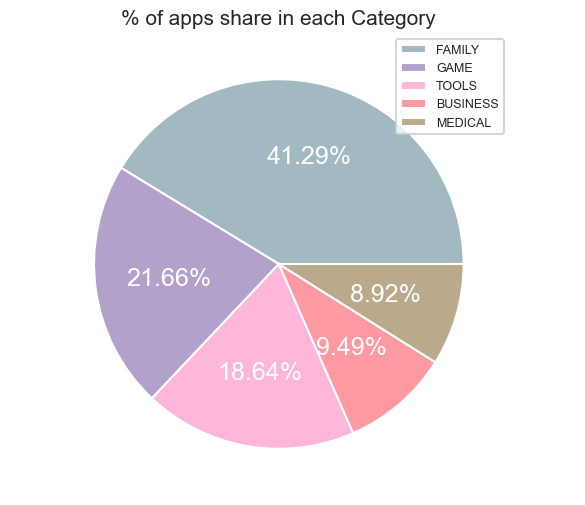

In [196]:
plt.figure(figsize=(6,6))

colors =['#A2B9C2', '#B1A1CB', '#FFB6D9', '#FF9AA2', '#BBA98C']

plt.pie(top_counts, labels=top_counts.index,colors=colors, autopct='%1.2f%%',textprops={'color':'white'})
my_circle = plt.Circle((0,0), 0.50, color='white')
plt.title('% of apps share in each Category', fontsize =15)
plt.legend(fontsize=9,loc='best')
plt.show()     

In [49]:
# We also rank in the top five categories. 
top5_categories=df['Category'].value_counts(ascending=False).head().reset_index()
top5_categories
     

,index,Category
0,FAMILY,1828
1,GAME,959
2,TOOLS,825
3,BUSINESS,420
4,MEDICAL,395


## Bottom 8 categories in the google play store

In [59]:
# calculating the bottom 8 categories
bottom_counts = df['Category'].value_counts().nsmallest(5)
bottom_counts

BEAUTY            53
COMICS            56
PARENTING         60
ART_AND_DESIGN    63
EVENTS            64
Name: Category, dtype: int64

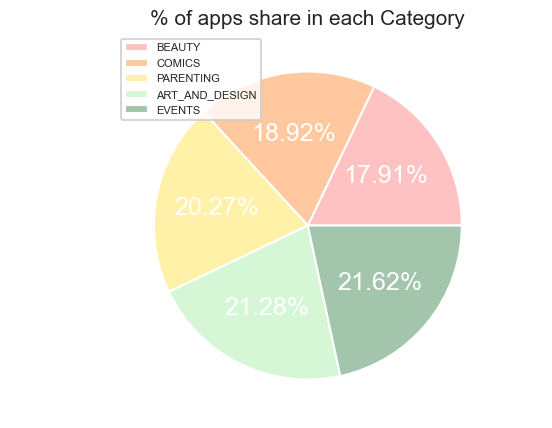

In [169]:
plt.figure(figsize=(5,5))

colors =['#FFC2C2', '#FFC89E', '#FFF1A8', '#D6F7D6', '#A2C5AC', '#A2B9C2', '#B1A1CB', '#FFB6D9', '#FF9AA2', '#BBA98C']

plt.pie(bottom_counts, labels=bottom_counts.index,colors=colors, autopct='%1.2f%%',textprops={'color':'white'})
my_circle = plt.Circle((0,0), 0.50, color='black')
plt.title('% of apps share in each Category', fontsize =15)
plt.legend(fontsize=8,loc='upper left')
plt.show()   

## Top 10 installed Apps under each category

In [191]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(7,3), dpi=100)
    plt.title('Top 10 Installed Apps',size = 12)
    sns.set_palette("pastel")
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=75, horizontalalignment='right',fontsize=10)
    graph.set_yticklabels(graph.get_yticklabels(),fontsize=10)

C:\Users\adeeb\AppData\Local\Temp\ipykernel_18688\2799278222.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_yticklabels(graph.get_yticklabels(),fontsize=10)
C:\Users\adeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  func(*args, **kwargs)
C:\Users\adeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


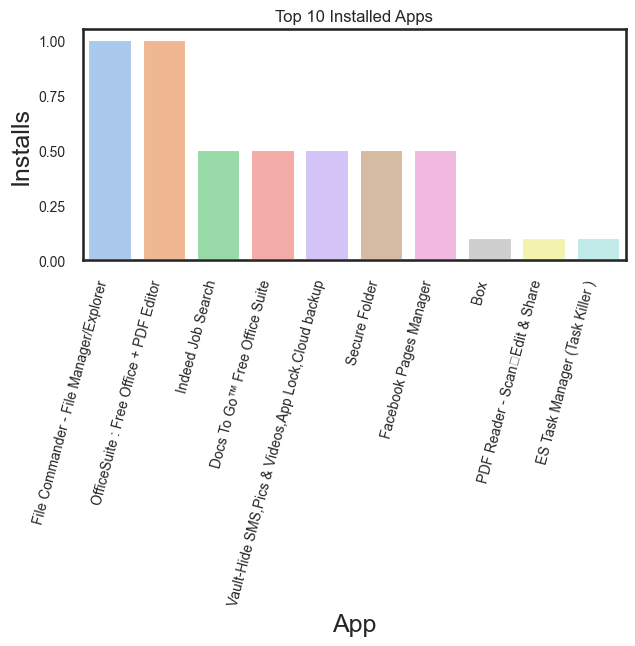

In [192]:
findtop10incategory('Business')

## Free Vs Paid Apps percentage

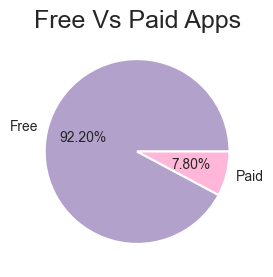

In [207]:
paid_or_free=df['Type'].value_counts()
labels=df['Type'].value_counts().index

#create pie chart 
plt.figure(figsize=(7,3))
colors= ['#B1A1CB', '#FFB6D9']
explode=(0.01,0.1)
plt.pie(paid_or_free,labels=labels,colors=colors,autopct='%.2f%%',textprops={'fontsize': 10})
plt.title('Free Vs Paid Apps')
plt.show()

## Content rating of apps

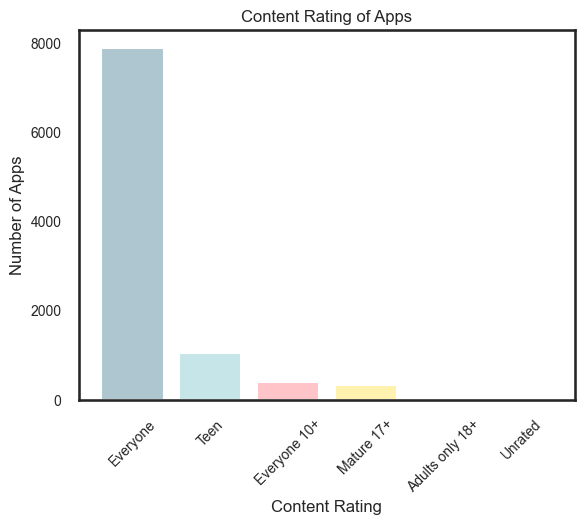

In [152]:
import matplotlib.pyplot as plt

data = df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']
colors=['#AEC6CF', '#C5E5E9', '#FFC4C7', '#FFF2AE', '#D1D1E0', '#FDDAEC', '#C7E9C0', '#FEC8D8', '#E6F5C9', '#FFE5CC']
plt.bar(labels, data,color=colors)
plt.title('Content Rating of Apps',fontsize=12)
plt.xlabel('Content Rating',fontsize=12)
plt.xticks(range(len(data)), labels, rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Apps',fontsize=12)
plt.show()

## Correlation between the columns

C:\Users\adeeb\AppData\Local\Temp\ipykernel_18688\363615674.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df.corr(),annot=True,annot_kws={'fontsize':10}, cmap='Pastel1')


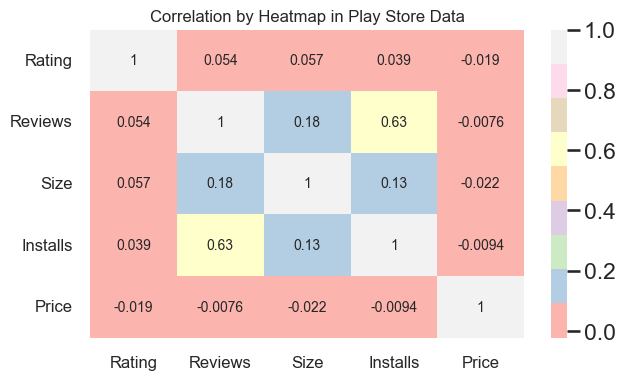

In [206]:
#plot a heatmap to see the correlaton between the columns
plt.figure(figsize=(7,4))
ax=sns.heatmap(df.corr(),annot=True,annot_kws={'fontsize':10}, cmap='Pastel1')
plt.title("Correlation by Heatmap in Play Store Data",fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.show()

## Top 10 Categories with highest installation

In [115]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9648, dtype: int32

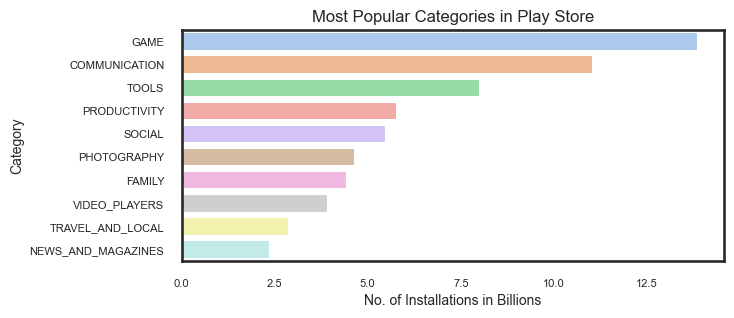

In [142]:
top_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
top_installs.Installs = top_installs.Installs/1000000000# converting into billions
top_installs_10 = top_installs.head(10)
plt.figure(figsize = (7,3))
sns.despine()
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = top_installs_10,palette='pastel' )
ax.set_xlabel('No. of Installations in Billions',fontsize=10)
ax.set_ylabel('Category',fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.set_title("Most Popular Categories in Play Store", size = 12)
sns.set_style("white")